<a href="https://colab.research.google.com/github/abosedealli/Stockprediction/blob/main/ARIMA%20High1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
stock_data = pd.read_csv("/content/AAPL.dataset.csv")

In [4]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,15/12/1980,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1,16/12/1980,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
2,17/12/1980,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
3,18/12/1980,0.118862,0.119420,0.118862,0.118862,0.092492,73449600
4,19/12/1980,0.126116,0.126674,0.126116,0.126116,0.098137,48630400
...,...,...,...,...,...,...,...
10609,12/01/2023,133.880005,134.259995,131.440002,133.410004,133.410004,71379600
10610,13/01/2023,132.029999,134.919998,131.660004,134.759995,134.759995,57758000
10611,17/01/2023,134.830002,137.289993,134.130005,135.940002,135.940002,63646600
10612,18/01/2023,136.820007,138.610001,135.029999,135.210007,135.210007,69672800


In [5]:
stock_data.set_index(pd.DatetimeIndex(stock_data['Date']), inplace=True)

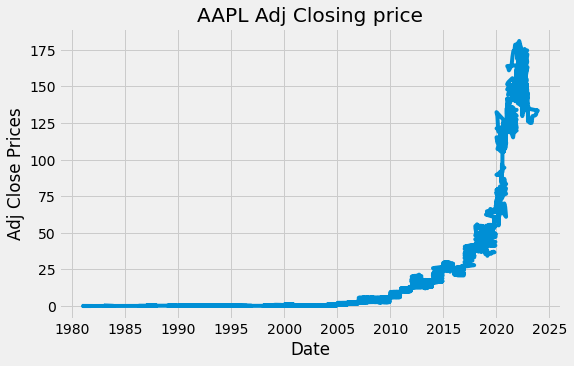

In [6]:
#plot close price
plt.figure(figsize=(8,5))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Adj Close Prices')
plt.plot(stock_data['Adj Close'])
plt.title('AAPL Adj Closing price')
plt.show()

In [7]:
df_close=stock_data['Adj Close']
df_close

Date
1980-12-15      0.094663
1980-12-16      0.087715
1980-12-17      0.089886
1980-12-18      0.092492
1980-12-19      0.098137
                 ...    
2023-12-01    133.410004
2023-01-13    134.759995
2023-01-17    135.940002
2023-01-18    135.210007
2023-01-19    135.270004
Name: Adj Close, Length: 10614, dtype: float64

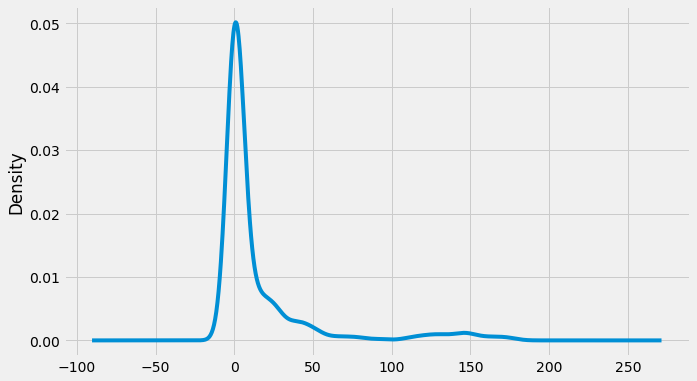

In [8]:
df_close.plot(kind='kde')

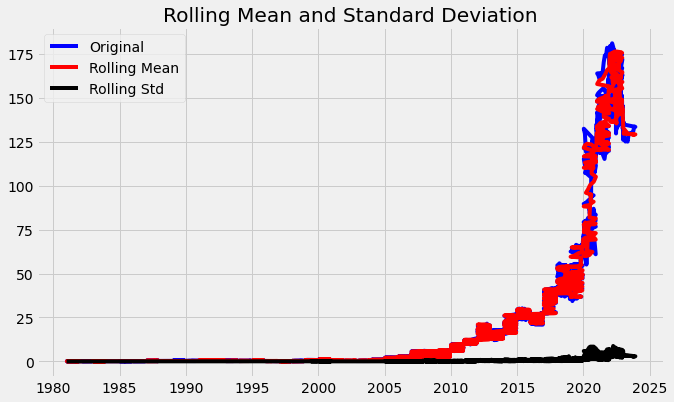

Results of dickey fuller test
Test Statistics                    2.038158
p-value                            0.998721
No. of lags used                  39.000000
Number of observations used    10574.000000
critical value (1%)               -3.430969
critical value (5%)               -2.861813
critical value (10%)              -2.566916
dtype: float64


In [10]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

In [ ]:
#non-stationary as pvalue >0.05 and Test Statistics is higher than critical value

<Figure size 720x432 with 0 Axes>

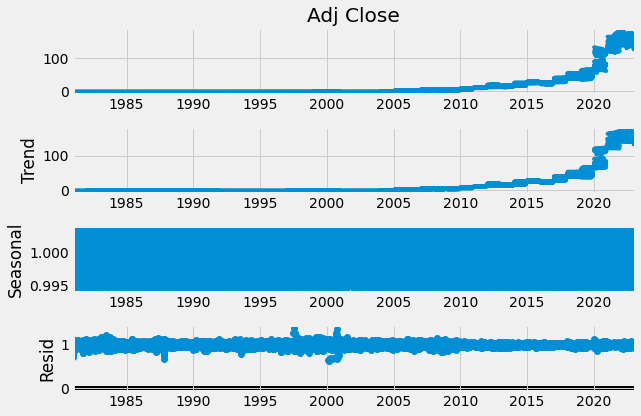

In [11]:
result=seasonal_decompose(df_close,model='multiplicative', extrapolate_trend='freq', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(9, 6)


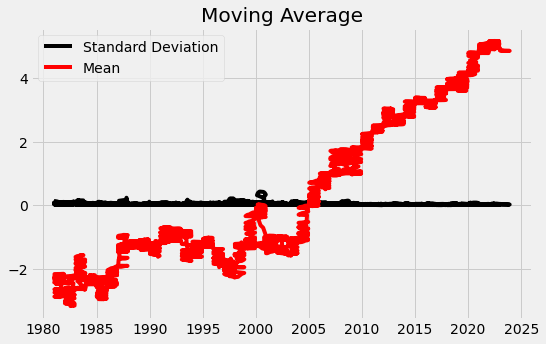

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

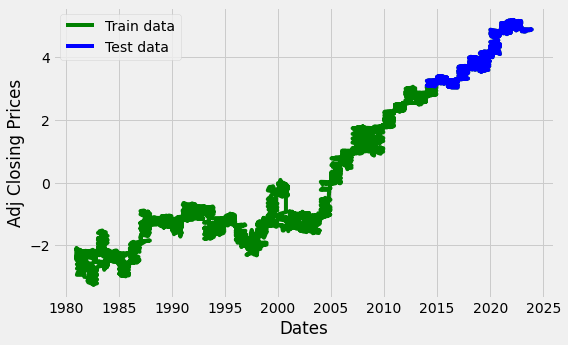

In [13]:
#split data into train and training set train=0.8 and test =0.2
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(8,5))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adj Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [19]:
train_data, test_data

(Date
 1980-12-18   -2.380633
 1980-12-19   -2.321391
 1980-12-22   -2.273871
 1980-12-23   -2.232537
 1980-12-24   -2.181244
                 ...   
 2014-07-08    3.052567
 2014-08-08    3.055315
 2014-11-08    3.068423
 2014-12-08    3.068215
 2014-08-13    3.081361
 Name: Adj Close, Length: 8488, dtype: float64, Date
 2014-08-14    3.084031
 2014-08-15    3.088942
 2014-08-18    3.100914
 2014-08-19    3.114635
 2014-08-20    3.115033
                 ...   
 2023-12-01    4.893427
 2023-01-13    4.903495
 2023-01-17    4.912214
 2023-01-18    4.906829
 2023-01-19    4.907273
 Name: Adj Close, Length: 2123, dtype: float64)

In [16]:
import pmdarima as pm

In [21]:
arima_model = pm.auto_arima(train_data, 
                        m=4, seasonal=True,
                      start_p=1, start_q=1, max_order=2, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=-35049.060, Time=8.09 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-35045.575, Time=0.97 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-35054.308, Time=1.33 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-35054.502, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-35043.844, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=-35048.564, Time=1.33 sec
 ARIMA(0,1,1)(1,0,1)[4] intercept   : AIC=-35052.426, Time=3.67 sec
 ARIMA(0,1,1)(0,0,2)[4] intercept   : AIC=-35052.536, Time=5.77 sec
 ARIMA(0,1,1)(1,0,0)[4] intercept   : AIC=-35054.546, Time=8.17 sec
 ARIMA(0,1,1)(2,0,0)[4] intercept   : AIC=-35052.651, Time=5.41 sec
 ARIMA(0,1,1)(2,0,1)[4] intercept   : AIC=-35050.621, Time=10.44 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=-35051.158, Time=1.26 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=-35051.123, Time=5.87 sec
 ARIMA(0,1,2)(1,0,0)[4] intercept   : AIC=-35056.016, Time=1.84 sec
 ARI

In [23]:
arima_model.fit(train_data)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(1, 0, 0, 4),
      suppress_warnings=True)

In [25]:
arima_model.fit(train_data)
forecast=arima_model.predict(n_periods=len(test_data), return_conf_int=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [27]:
forecast_df = pd.DataFrame()
forecast_df['Prediction'] = forecast[0]
forecast_df.set_index(test_data.index,inplace=True)



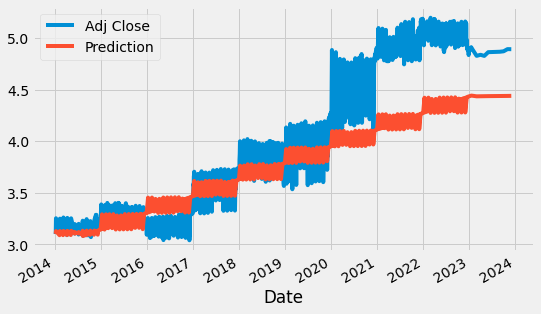

In [30]:
short_model = pd.concat([test_data,forecast_df],axis=1)
short_model.replace([np.inf, -np.inf], np.nan, inplace=True)
short_model.dropna(inplace=True)
short_model.plot()
     

In [33]:
short_model

,Adj Close,Prediction
Date,,
2014-08-14,3.084031,3.081997
2014-08-15,3.088942,3.082766
2014-08-18,3.100914,3.082980
2014-08-19,3.114635,3.084000
2014-08-20,3.115033,3.084642
...,...,...
2023-12-01,4.893427,4.440957
2023-01-13,4.903495,4.441599
2023-01-17,4.912214,4.442240


In [35]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(forecast_df['Prediction'] - test_data))

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((forecast_df['Prediction']  - test_data)**2))
mape = np.mean(np.abs(forecast_df['Prediction']  - test_data) / test_data)
mse=(np.mean((forecast_df['Prediction'] - test_data)**2))


print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE", mse)
print("MAE:", mae)

RMSE: 0.4090327906883391
MAPE: 0.06684227660978768
MSE 0.1673078238582906
MAE: 0.29817365652080063
